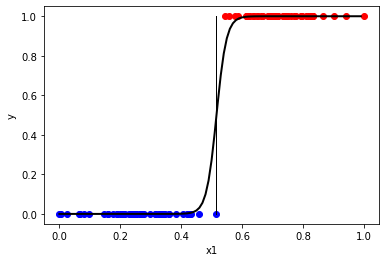

In [92]:
#implementation of logistic regression with 1 feature and 2 classes
import numpy as np
from numpy.random import randn, uniform
from numpy import matmul
import matplotlib.pyplot as plt


def vector_sigmoid(vector):
    # apply the sigmoid function to all elements of a vector
    return 1 / (1 + 2.718 ** -vector)


def normalized(vector): 
    return (vector - min(vector)) / (max(vector) - min(vector))


def get_derivative(X, y, theta, theta_index):
    # get the partial derivative of the cost function relative to x[theta_index] (for each training example)
    return (1 / m) * sum((vector_sigmoid(matmul(X, theta)) - y) * X[:, theta_index])


m = 100 #number of training examples
m_div = m // 2 # number of examples in each cluster
X = np.array((np.ones(m), np.append(randn(m_div), randn(m_div) + uniform(4, 6))))
if uniform(0, 1) > 0.5: y = np.append(np.zeros(m_div), np.ones(m_div)) # 50% chance
else:                   y = np.append(np.ones(m_div), np.zeros(m_div)) # 50% chance

X[1:] = np.array([normalized(x) for x in X[1:]]) # normalize X
y = normalized(y)                                # normalize y

X = X.T # for easier computation

theta = np.full(len(X[0]), 0.5)
delta_theta = np.ones(theta.shape)
a = 80 # learning rate

# i = 0
while sum(abs(delta_theta)) > 1 * 10 ** -0: # controls the needed decrease in cost to continue 
    for t in range(len(delta_theta)):
        delta_theta[t] = - a * get_derivative(X, y, theta, t)
    theta += delta_theta
#     i += 1
#     print(i, theta, delta_theta)
#     plt.scatter(X[:, 1][: m_div], y[:m_div], color='b')
#     plt.scatter(X[:, 1][m_div:], y[m_div:], color='r')

#     accuracy = 1000
#     sig_x_values = np.arange(0, 1, 1 / accuracy)
#     sig_y_values = vector_sigmoid(matmul(np.array([np.ones(accuracy), sig_x_values]).T, theta))

#     plt.plot(sig_x_values, sig_y_values, color='black', linewidth='2') # show sigmoid function for range(0, 1)

#     divisor_x_values = [sig_x_values[np.where(sig_y_values == min(sig_y_values, key=lambda x:abs(x - 0.5)))]] * 2
#     divisor_y_values = [0, 1]
#     plt.plot(divisor_x_values, divisor_y_values, color='black', linewidth='1') # show point where the sigmoid function reaches 0.5

#     plt.show()
#     plt.pause(0.001)
#     plt.clf()

plt.scatter(X[:, 1][: m_div], y[:m_div], color='b')
plt.scatter(X[:, 1][m_div:], y[m_div:], color='r')

accuracy = 100
sig_x_values = np.arange(0, 1, 1 / accuracy)
sig_y_values = vector_sigmoid(matmul(np.array([np.ones(accuracy), sig_x_values]).T, theta))

plt.plot(sig_x_values, sig_y_values, color='black', linewidth='2') # show sigmoid function for range(0, 1)

divisor_x_values = [-theta[0] / theta[1]] * 2
divisor_y_values = [0, 1]
plt.plot(divisor_x_values, divisor_y_values, color='black', linewidth='1') # show point where the sigmoid function reaches 0.5

plt.xlabel('x1')
plt.ylabel('y')

plt.show()